In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

<h1>PREPARING DATA</h1>

<h4>0. Input Data</h4>

In [20]:
df = pd.read_excel('input\ENOSE-rekap.xlsx')
#df.head()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MQ2        1800 non-null   float64
 1   MQ3        1800 non-null   float64
 2   MQ4        1800 non-null   float64
 3   MQ5        1800 non-null   float64
 4   MQ6        1800 non-null   float64
 5   MQ7        1800 non-null   float64
 6   MQ8        1800 non-null   float64
 7   MQ9        1800 non-null   float64
 8   MQ135      1800 non-null   float64
 9   Pohon      1800 non-null   object 
 10  Kode Daun  1800 non-null   object 
 11  Treatment  1800 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 168.9+ KB


In [22]:
df.describe()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,Treatment
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,-0.004361,0.000672,-0.008644,-0.001672,-0.000589,-0.001111,-0.000217,-0.000356,-0.001367,0.500000
std,0.024325,0.019668,0.090904,0.016349,0.009311,0.005000,0.014990,0.016737,0.007612,0.500139
min,-0.130000,-0.090000,-0.190000,-0.070000,-0.090000,-0.020000,-0.060000,-0.080000,-0.080000,0.000000
25%,-0.020000,-0.010000,-0.030000,-0.010000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.080000,0.140000,0.710000,0.120000,0.030000,0.010000,0.120000,0.160000,0.020000,1.000000


In [23]:
df.drop(['Pohon', 'Kode Daun'], axis=1, inplace=True)

In [24]:
df.head()

,MQ2,MQ3,MQ4,MQ5,MQ6,MQ7,MQ8,MQ9,MQ135,Treatment
0,-0.05,0.01,-0.10,-0.02,0.0,-0.01,-0.01,-0.03,-0.01,0
1,-0.04,0.00,-0.12,-0.01,0.0,-0.01,0.00,-0.03,-0.01,0
2,-0.03,0.00,-0.06,-0.02,0.0,-0.01,0.00,-0.03,0.00,0
3,-0.04,0.00,-0.09,-0.02,0.0,-0.01,0.00,-0.03,-0.01,0
4,-0.05,0.00,-0.09,-0.02,0.0,-0.01,0.00,-0.03,-0.01,0


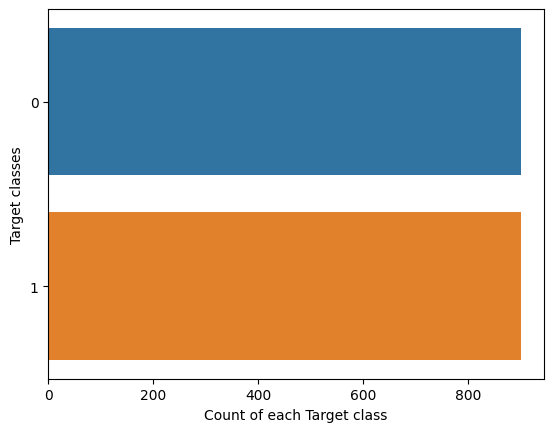

In [25]:
sns.countplot(y=df.Treatment, data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

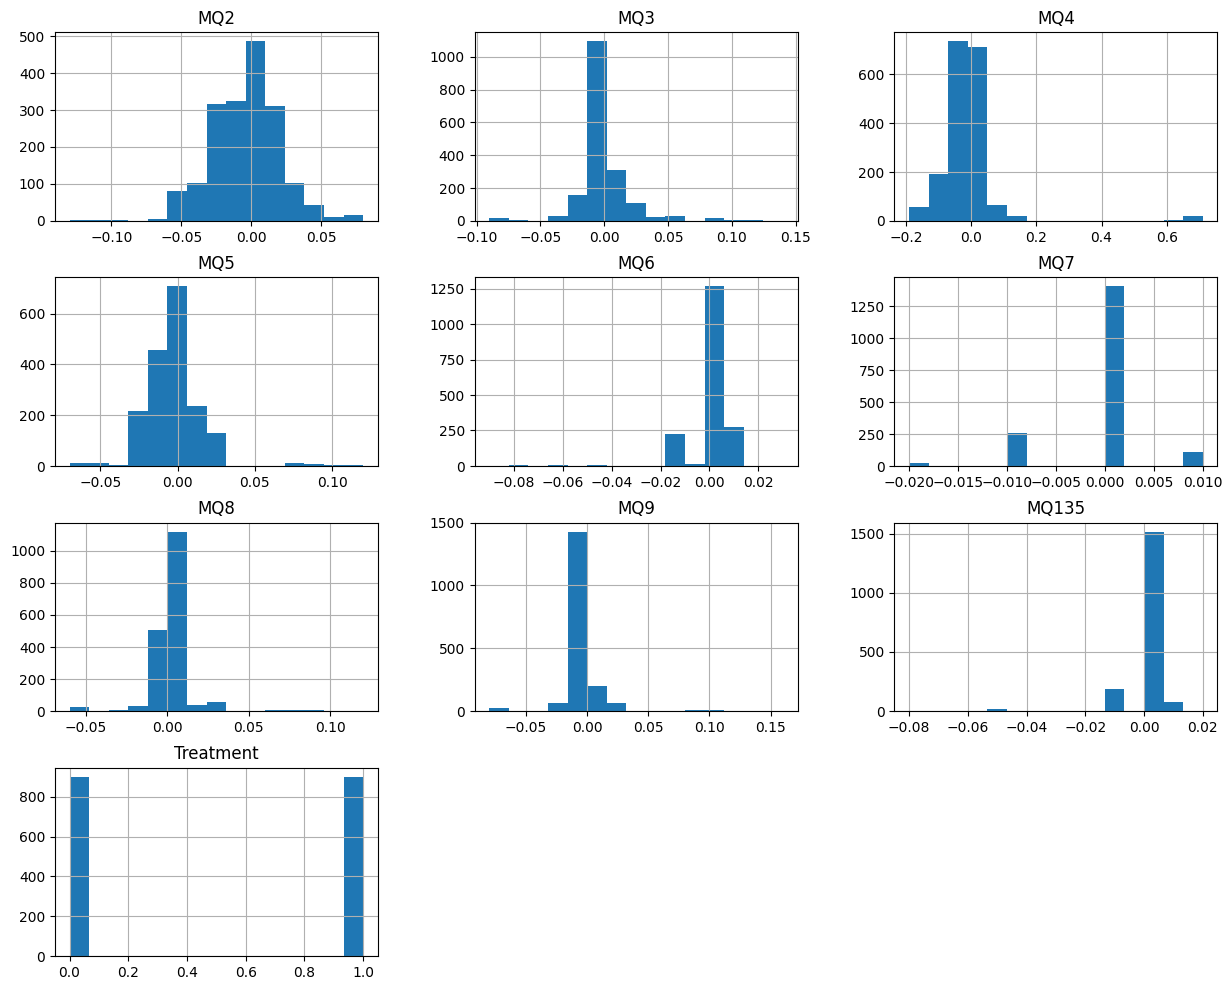

In [26]:
df.hist(figsize=(15,12), bins=15)
plt.title("Features Distribution")
plt.show()

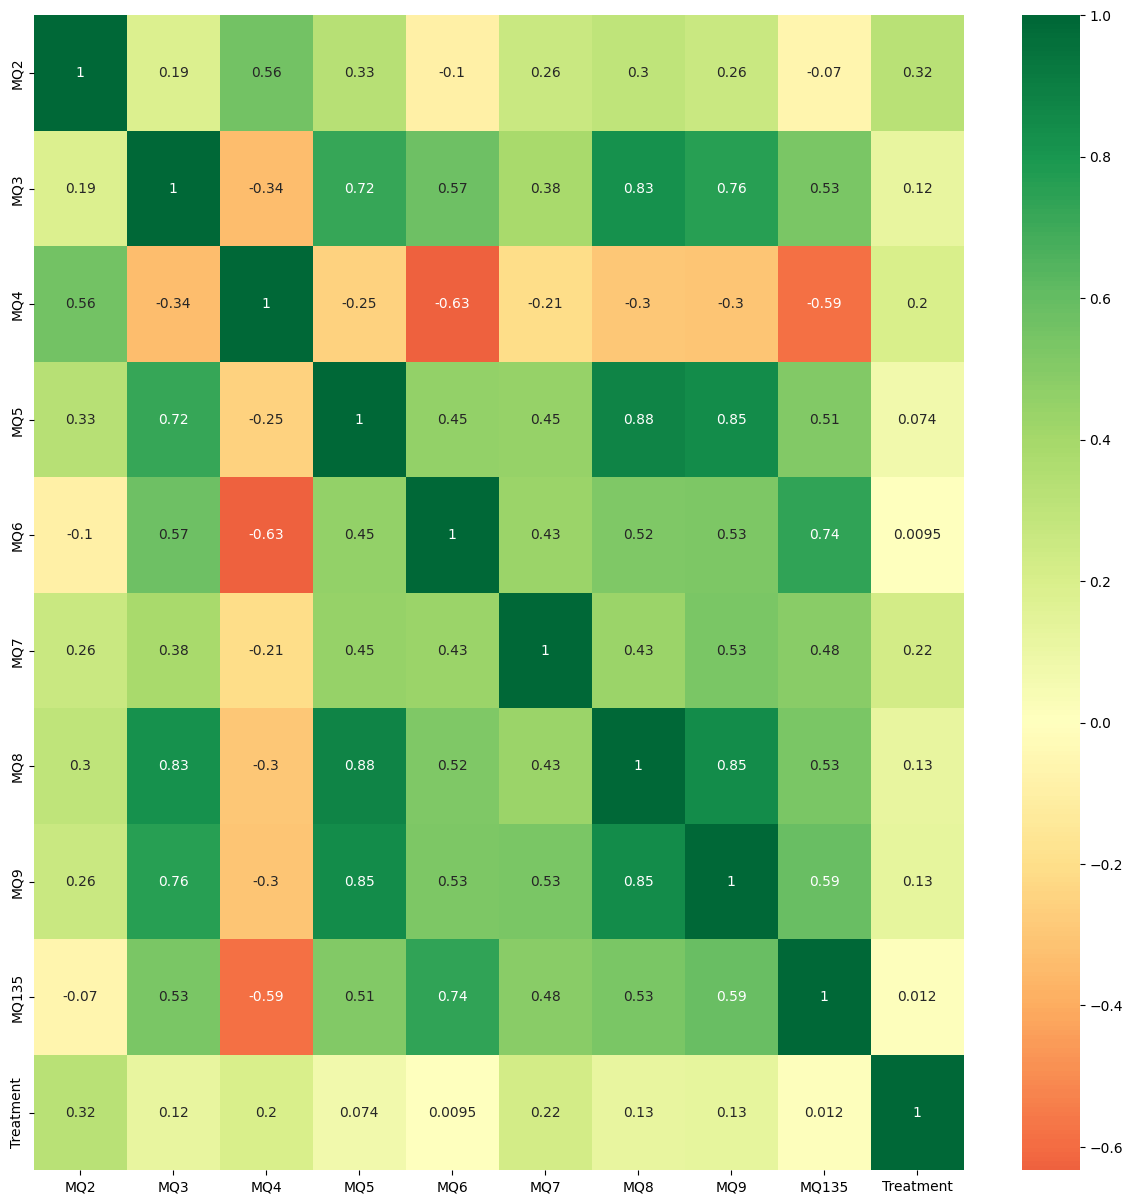

In [27]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0)

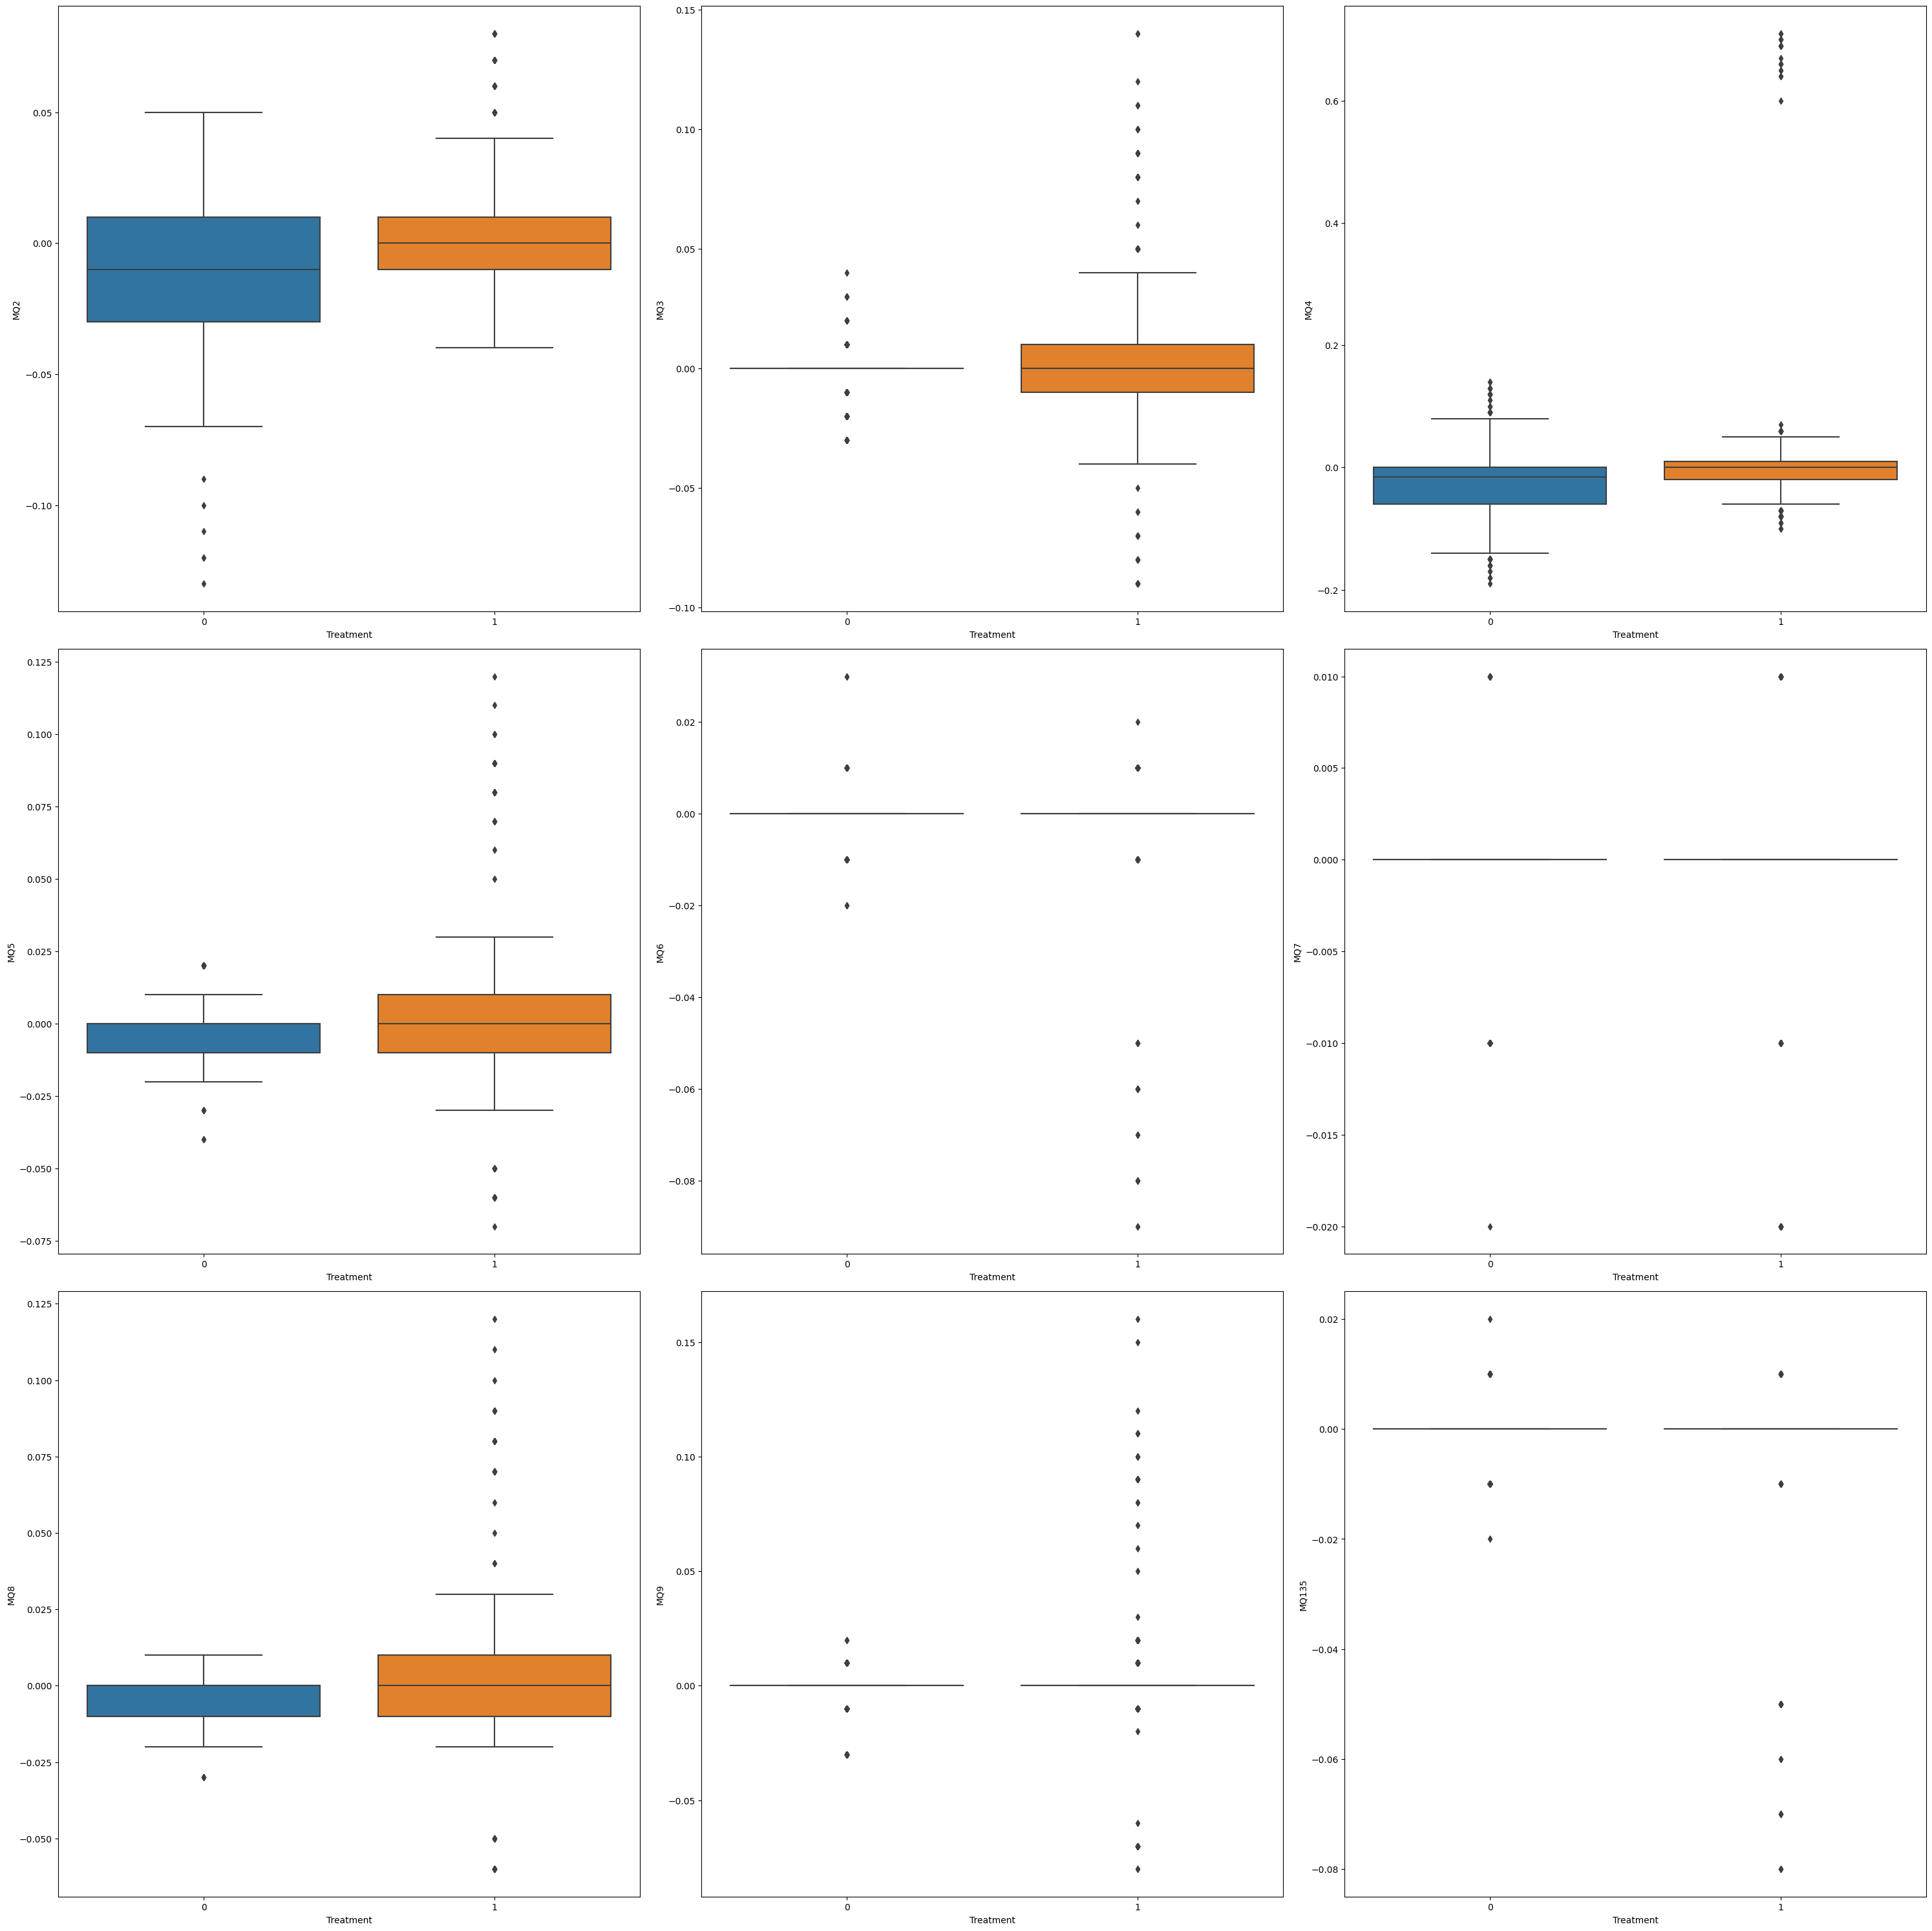

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(df.columns)-1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x = df['Treatment'], y = df[df.columns[i]],ax=axes)
    col += 1
plt.tight_layout()
plt.show()

In [29]:
X = df.drop(['Treatment'], axis=1)
y = df.Treatment

<h4>1. Membagi Data untuk Training dan Testing</h4>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1440
1440
360
360


<h4>2. Standarisasi Data</h4>
<p>Feature Skaling bertujuan agar satu variable independen tidak mendominasi variable yang lain sehingga perhitungan yang dilakuan menjadi lebih mudah.</p>

In [31]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#print(X_train)
#print(X_test)

<h1>METODE 4: Multilayer Perceptron (mlp)</h1>

In [32]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

<h4>1. Menentukan parameter terbaik</h4>

In [33]:
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=8)

param_grid = {
    'hidden_layer_sizes':[5,10,15],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate':['constant','invscaling','adaptive'],
    'max_iter': [200,500,1000],
    }

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring=['recall','f1'],refit='f1',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 324 candidates, totalling 324 fits
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=sgd; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.4s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=500, solver=sgd; total time=   0.5s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=500, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_i

<h4>2. Membangun arsitektur MLP</h4>

In [ ]:
# X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train,
#                                                         test_size=0.2)

mlp = MLPClassifier(hidden_layer_sizes=10,activation='tanh',
                            learning_rate='invscaling', solver='lbfgs', max_iter=200,
                            random_state=8)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       192
           1       0.85      0.83      0.84       168

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



In [ ]:
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)
print('Recall:{}'.format(recall_score(y_test, y_pred_mlp, average='macro')))
print('Precision:{}'.format(precision_score(y_test, y_pred_mlp, average='macro')))
print('F1-Score:{}'.format(f1_score(y_test, y_pred_mlp, average='macro')))

[[167  25]
 [ 29 139]]
Recall:0.8485863095238095
Precision:0.8498008959681433
F1-Score:0.8490870699292014


Accuracy with MLP: 85.00%


Text(0.5, 23.52222222222222, 'Predicted label')

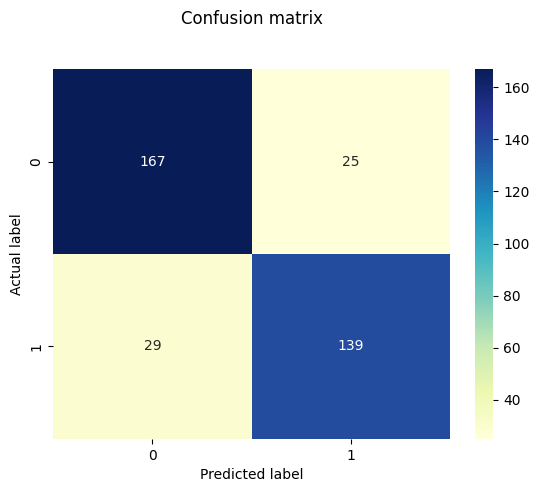

In [ ]:
cm = confusion_matrix(y_test, y_pred_mlp)
accuracy = accuracy_score(y_test, y_pred_mlp)*100
print("Accuracy with MLP: {0:.2f}%".format(accuracy))

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')